# Proceso de ETL con Python
### Importar librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os

In [12]:
#importar los archivos csv a un dataframe de pandas 

linea_mujeres = pd.read_csv('./linea-mujeres-1116-021120 (1).csv' , encoding='latin-1')
atencion_mujeres = pd.read_csv('./atenciones_abogadas_de_las_mujeres.csv')



c:\Users\Adolfo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Sabemos que los datos de el primer csv son provenientes de toda la republica Mexicana, aunque nosotros solo utilizaremos de la ciudad de México. Por lo cual los filtraremos por el csv proveniente de la ciudad de México.


In [13]:
linea_mujeres.head()

,FOLIO,FECHA_ALTA,AÑO_ALTA,MES_ALTA,DÍA_ALTA,HORA_ALTA,SEXO,EDAD,ESTADO_CIVIL,OCUPACION,...,CP_HECHOS,ORIGEN,SERVICIO,TEMATICA_1,TEMATICA_2,TEMATICA_3,TEMATICA_4,TEMATICA_5,TEMATICA_6,TEMATICA_7
0,3012.0,2016-11-01,2016,11,1,0,FEMENINO,54,SOLTERO (A),EMPLEADO (A),...,NaN,ASESORÍA,JURÍDICO,INFORMACION GENERAL,DEPENDENCIAS ADMINISTRATIVAS,REFERENCIA INSTITUCIONAL,NaN,NaN,NaN,NaN
1,3013.0,2016-11-01,2016,11,1,0,FEMENINO,42,SOLTERO (A),EMPLEADO (A),...,7330.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,ABUSO SEXUAL,MENORES DE EDAD,NaN,NaN,NaN
2,3014.0,2016-11-01,2016,11,1,1,FEMENINO,40,SOLTERO (A),DESEMPLEADO (A),...,2100.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,NaN,NaN,NaN,NaN
3,3015.0,2016-11-01,2016,11,1,1,FEMENINO,55,SOLTERO (A),EMPLEADO (A),...,NaN,ASESORÍA,JURÍDICO,INFORMACION GENERAL,GARANTIAS DEL GOBERNADO,NaN,NaN,NaN,NaN,NaN
4,3022.0,2016-11-01,2016,11,1,8,FEMENINO,52,CASADO (A),EMPLEADO (A),...,1730.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,MAYORES DE EDAD,NaN,NaN,NaN


In [14]:
#seleccionar las filas que contengan el valor de la columna "CP_HECHOS" dentro del rango de 01000 a 16900
#url de los datos -> https://codigo-postal.co/mexico/

linea_mujeres = linea_mujeres[(linea_mujeres['CP_HECHOS'] >= 1000) & (linea_mujeres['CP_HECHOS'] <= 16900)]
linea_mujeres.head()

,FOLIO,FECHA_ALTA,AÑO_ALTA,MES_ALTA,DÍA_ALTA,HORA_ALTA,SEXO,EDAD,ESTADO_CIVIL,OCUPACION,...,CP_HECHOS,ORIGEN,SERVICIO,TEMATICA_1,TEMATICA_2,TEMATICA_3,TEMATICA_4,TEMATICA_5,TEMATICA_6,TEMATICA_7
1,3013.0,2016-11-01,2016,11,1,0,FEMENINO,42,SOLTERO (A),EMPLEADO (A),...,7330.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,ABUSO SEXUAL,MENORES DE EDAD,NaN,NaN,NaN
2,3014.0,2016-11-01,2016,11,1,1,FEMENINO,40,SOLTERO (A),DESEMPLEADO (A),...,2100.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,NaN,NaN,NaN,NaN
4,3022.0,2016-11-01,2016,11,1,8,FEMENINO,52,CASADO (A),EMPLEADO (A),...,1730.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA INTEGRIDAD FAMILIAR,VIOLENCIA FAMILIAR,MAYORES DE EDAD,NaN,NaN,NaN
5,3024.0,2016-11-01,2016,11,1,8,FEMENINO,64,SOLTERO (A),EMPLEADO (A),...,2800.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA EL PATRIMONIO,ABUSO DE CONFIANZA,NaN,NaN,NaN,NaN
6,3025.0,2016-11-01,2016,11,1,8,FEMENINO,55,CASADO (A),HOGAR,...,7800.0,ASESORÍA,JURÍDICO,ADMINISTRATIVA,TRAMITES ADMINISTRATIVOS,DELEGACION POLITICA,VENTANILLA ÚNICA,NaN,NaN,NaN


In [15]:
#Total de registros en el dataframe 
linea_mujeres.shape

(87810, 28)

Obtenemos un total de 87,810 registros para la Ciudad de México, con esto podemos trabajar para realizar el ETL -> 



In [25]:
#seleccionar las filas que contengan el valor de la columna "SERVICIO" igual a "JURÍDICO"
linea_mujeres_juri = linea_mujeres[linea_mujeres['SERVICIO'] == 'JURÍDICO']
linea_mujeres_juri.head()
linea_mujeres_juri.shape

(61480, 28)

Obtemos un total de 614 registros en el dataframe lo que es bueno -> podemos continuar con el análisis

In [19]:
atencion_mujeres.head()

,fecha,agencia,usuaria_sexo,usuaria_nacionalidad,usuaria_ent_fed_nacimiento,usuaria_estado_civil,usuaria_edad,usuaria_hijas,usuaria_hijos,usuaria_hijes,...,riesgo_feminicida,vio_psicoemocional,vio_fisica,vio_economica,vio_patrimonial,vio_sexual,vio_simbolica,vio_obstetrica,vio_reproductivos,vio_feminicida
0,2019-03-01,TLP-2 Y 3,MUJER,MEXICANA,CIUDAD DE MÉXICO,NaN,33.0,0.0,3.0,3.0,...,NaN,Sí,No,No,No,No,No,No,No,No
1,2019-03-01,TLP-2 Y 3,MUJER,MEXICANA,CIUDAD DE MÉXICO,NaN,26.0,NaN,NaN,NaN,...,NaN,No,Sí,No,No,No,No,No,No,No
2,2019-03-01,TLP-2 Y 3,MUJER,MEXICANA,CIUDAD DE MÉXICO,CASADA(O),25.0,1.0,NaN,1.0,...,NaN,No,Sí,No,No,No,No,No,No,No
3,2019-03-01,MH-1,MUJER,MEXICANA,CIUDAD DE MÉXICO,UNIÓN LIBRE O CONCUBINATO,55.0,1.0,0.0,1.0,...,NaN,Sí,No,No,No,No,No,No,No,No
4,2019-03-01,IZP-9 Y 10,MUJER,MEXICANA,CIUDAD DE MÉXICO,NaN,33.0,1.0,0.0,1.0,...,NaN,Sí,No,No,No,No,No,No,No,No


Crearemos una tabla donde unicamente utilizaremos como valores los datos obtenidos de la tematica 5 'ABUSO SEXUAL' de la tabla de la linea de mujeres, adjuntandolos a la tabla de atencion de abogadas de las mujeres con la etiqueta 'vio_sexual'

In [41]:
#seleccionar las filas  de la tabla linea_mujeres que contengan el valor de la columna "TEMATICA_5" igual a "ABUSO SEXUAL"


#iterate through each row in the dataframe linea_mujeres_juri
arreglo_temporal = []
for index, row in linea_mujeres_juri.iterrows():
    #print(row['TEMATICA_5'])
    if(row['TEMATICA_2'] == 'DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXUALES Y EL NORMAL DESARROLLO PSICOSEXUAL'):
        arreglo_temporal.append(row)

#crear un dataframe a partir del arreglo temporal
linea_mujeres_juri_abuso_sexual = pd.DataFrame(arreglo_temporal)
linea_mujeres_juri_abuso_sexual.head()    
        


,FOLIO,FECHA_ALTA,AÑO_ALTA,MES_ALTA,DÍA_ALTA,HORA_ALTA,SEXO,EDAD,ESTADO_CIVIL,OCUPACION,...,CP_HECHOS,ORIGEN,SERVICIO,TEMATICA_1,TEMATICA_2,TEMATICA_3,TEMATICA_4,TEMATICA_5,TEMATICA_6,TEMATICA_7
1,3013.0,2016-11-01,2016,11,1,0,FEMENINO,42,SOLTERO (A),EMPLEADO (A),...,7330.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,ABUSO SEXUAL,MENORES DE EDAD,NaN,NaN,NaN
197,3340.0,2016-11-03,2016,11,3,9,FEMENINO,45,CASADO (A),HOGAR,...,9180.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,ABUSO SEXUAL,MENORES DE EDAD,NaN,NaN,NaN
467,3780.0,2016-11-04,2016,11,4,16,FEMENINO,16,SOLTERO (A),ESTUDIANTE,...,6900.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,HOSTIGAMIENTO SEXUAL,MENORES DE EDAD,NaN,NaN,NaN
1010,4625.0,2016-11-07,2016,11,7,13,FEMENINO,23,SOLTERO (A),EMPLEADO (A),...,15900.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,ABUSO SEXUAL,MAYORES DE EDAD,NaN,NaN,NaN
1304,5112.0,2016-11-08,2016,11,8,15,FEMENINO,59,SOLTERO (A),HOGAR,...,6800.0,ASESORÍA,JURÍDICO,PENAL,DELITOS CONTRA LA LIBERTAD Y LA SEGURIDAD SEXU...,VIOLACIÓN,MAYORES DE EDAD,NaN,NaN,NaN


In [43]:
len(linea_mujeres_juri_abuso_sexual)
#tenemos 646 casos de abuso sexual en la linea de mujeres

646

Buscar en la tabla "atencion_mujeres" el valor positivo de "vio_sexual"

In [44]:
#Buscar los casos de abuso sexual en la tabla atencion_mujeres
arreglo_temporal = []
for index, row in atencion_mujeres.iterrows():
    if(row['vio_sexual'] == 'Sí'):
        arreglo_temporal.append(row)
#crear un dataframe a partir del arreglo temporal
atencion_mujeres_abuso_sexual = pd.DataFrame(arreglo_temporal)
atencion_mujeres_abuso_sexual.head()    

,fecha,agencia,usuaria_sexo,usuaria_nacionalidad,usuaria_ent_fed_nacimiento,usuaria_estado_civil,usuaria_edad,usuaria_hijas,usuaria_hijos,usuaria_hijes,...,riesgo_feminicida,vio_psicoemocional,vio_fisica,vio_economica,vio_patrimonial,vio_sexual,vio_simbolica,vio_obstetrica,vio_reproductivos,vio_feminicida
19,2019-03-01,CUH-2,MUJER,MEXICANA,CIUDAD DE MÉXICO,UNIÓN LIBRE O CONCUBINATO,20.0,1.0,0.0,1.0,...,NaN,Sí,Sí,Sí,Sí,Sí,No,No,No,No
41,2019-03-01,FDS-6,MUJER,MEXICANA,CIUDAD DE MÉXICO,NaN,30.0,2.0,0.0,2.0,...,NaN,No,No,No,No,Sí,No,No,No,No
42,2019-03-01,FDS-6,MUJER,MEXICANA,CIUDAD DE MÉXICO,NaN,8.0,0.0,0.0,0.0,...,NaN,No,No,No,No,Sí,No,No,No,No
43,2019-03-01,FDS-6,MUJER,MEXICANA,CIUDAD DE MÉXICO,NaN,6.0,0.0,0.0,0.0,...,NaN,No,No,No,No,Sí,No,No,No,No
44,2019-03-01,FDS-6,MUJER,MEXICANA,CIUDAD DE MÉXICO,NaN,40.0,0.0,0.0,1.0,...,NaN,No,No,No,No,Sí,No,No,No,No


In [45]:
len(atencion_mujeres_abuso_sexual) 
#tenemos 1,000 casos de abuso sexual en la tabla atencion_mujeres

15502

In [46]:
fecha_atencion_tabla2 = pd.to_datetime(atencion_mujeres_abuso_sexual["fecha"])
fecha_atencion_tabla1 = pd.to_datetime(linea_mujeres_juri_abuso_sexual["FECHA_ALTA"])

In [49]:
usuaria_edad_tabla1 = linea_mujeres_juri_abuso_sexual["EDAD"]
usuaria_edad_tabla2 = atencion_mujeres_abuso_sexual["usuaria_edad"]

In [50]:
usuaria_edad_tabla1.head()

1       42
197     45
467     16
1010    23
1304    59
Name: EDAD, dtype: int64

In [51]:
usuaria_estado_civil_tabla1 = linea_mujeres_juri_abuso_sexual["ESTADO_CIVIL"]
usuaria_estado_civil_tabla2 = atencion_mujeres_abuso_sexual["usuaria_estado_civil"]

In [53]:
#crear un dataframe a partir de las siguientes series: fecha_atencion_tabla1,usuaria_edad_tabla1,usuaria_estado_civil_tabla1 con los nombres de las columnas: fecha_atencion,usuaria_edad,usuaria_estado_civil
df1 = pd.DataFrame({'fecha_atencion': fecha_atencion_tabla1, 'usuaria_edad': usuaria_edad_tabla1, 'usuaria_estado_civil': usuaria_estado_civil_tabla1})
df1.head()

,fecha_atencion,usuaria_edad,usuaria_estado_civil
1,2016-11-01,42,SOLTERO (A)
197,2016-11-03,45,CASADO (A)
467,2016-11-04,16,SOLTERO (A)
1010,2016-11-07,23,SOLTERO (A)
1304,2016-11-08,59,SOLTERO (A)


In [54]:
#crear un dataframe a partir de las siguientes series: fecha_atencion_tabla2,usuaria_edad_tabla2,usuaria_estado_civil_tabla2 con los nombres de las columnas: fecha_atencion,usuaria_edad,usuaria_estado_civil
df2 = pd.DataFrame({'fecha_atencion': fecha_atencion_tabla2, 'usuaria_edad': usuaria_edad_tabla2, 'usuaria_estado_civil': usuaria_estado_civil_tabla2})


In [55]:
df2.head()

,fecha_atencion,usuaria_edad,usuaria_estado_civil
19,2019-03-01,20.0,UNIÓN LIBRE O CONCUBINATO
41,2019-03-01,30.0,NaN
42,2019-03-01,8.0,NaN
43,2019-03-01,6.0,NaN
44,2019-03-01,40.0,NaN


In [56]:
len(df2)

15502

In [59]:
#unir df1 con df2

vertical_concat = pd.concat([df1, df2], axis=0)


In [60]:
vertical_concat.head(5)

,fecha_atencion,usuaria_edad,usuaria_estado_civil
1,2016-11-01,42.0,SOLTERO (A)
197,2016-11-03,45.0,CASADO (A)
467,2016-11-04,16.0,SOLTERO (A)
1010,2016-11-07,23.0,SOLTERO (A)
1304,2016-11-08,59.0,SOLTERO (A)


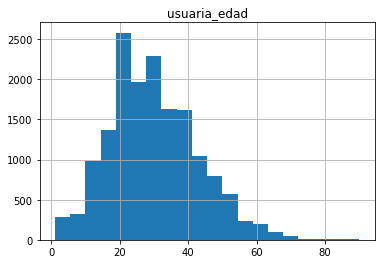

In [63]:
import matplotlib.pyplot as plt
import numpy as np
  
#vertical_concat.reset_index().plot(kind='scatter', x='index', y='fecha_atencion')
#plt.show()

#imprimir el histograma de la columna usuaria_edad
vertical_concat.hist(column='usuaria_edad', bins=20)
plt.show()

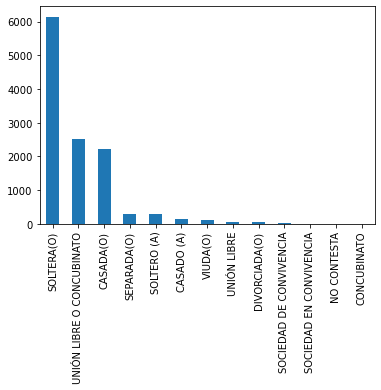

In [65]:
#plot column 'usuaria_estado_civil' as a bar chart
vertical_concat['usuaria_estado_civil'].value_counts().plot(kind='bar')
plt.show()


Como dato -> 
El estado civil de las personas de 15 años o más de edad en México se distribuye de la siguiente manera: 38% está casada, 30% soltera, 20% vive en unión libre, 6% separada, 5% viuda y 2% está divorciada. En 2020, en nuestro país hubo 33% menos matrimonios registrados que en 2019.
INEGI 2019

Por lo que el hallazgo es que lamentablemente siendo soltera corres más riesgo de sufrir algun tipo de abuso sexual